In [1]:
#specifying the folder where images are present

In [28]:
TrainingImagePath = "D:\\PGDA-28\\Capstone Projects\\Capstone Project On Facial Recognition\\Facial Reco\\train"

In [29]:
validationImagePath = "D:\\PGDA-28\\Capstone Projects\\Capstone Project On Facial Recognition\\Facial Reco\\validation"

In [30]:
from keras.preprocessing.image import ImageDataGenerator

In [31]:
#base model

In [32]:
train_datagen = ImageDataGenerator(rescale = 1./225)

In [33]:
test_datagen = ImageDataGenerator(rescale = 1./225)

In [34]:
#Generating the training data

In [35]:
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                target_size = (64,64),
                                                batch_size = 20,
                                                class_mode = 'categorical')

Found 200 images belonging to 25 classes.


# Validation set

In [ ]:
#Generating the validation data

In [36]:
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                target_size = (64,64),
                                                batch_size = 20,
                                                class_mode = 'categorical')

Found 50 images belonging to 25 classes.


In [37]:
# Libraries and model type

In [38]:
# Create CNN Deep learning model

In [39]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [40]:
# Initializing the Convolutional Neural Network

In [41]:
classifier = Sequential()

# MODEL

In [42]:
# STEP 1 Convolution
# Adding th e first layer of CNN
# We are using the format (64,64,3) because we are using Tensorflow backend
# It means 3 matrix of size (64x64) pixels representing Red, Green and Blue components of pixels

In [43]:
classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation ='relu'))

In [44]:
#STEP 2- Max Pooling

In [45]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [46]:
# Additional layer of convolution for better accuracy

In [47]:
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

In [48]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [49]:
#STEP 3- Flattening

In [50]:
classifier.add(Flatten())

In [51]:
#STEP 4 - Fully connected neural network

In [52]:
classifier.add(Dense(64, activation='relu'))

In [53]:
classifier.add(Dense(25, activation='softmax'))

In [54]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8

# Compiler

In [55]:
# Compiling the CNN

In [56]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer = 'adam', metrics =['accuracy'])

# Execution of model

In [57]:
# Starting the model training

In [58]:
history = classifier.fit_generator(training_set, epochs =20,
                                  validation_data=validation_set)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12964\2354014473.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs =20,


Epoch 1/20
10/10 [==============================] - 14s 1s/step - loss: 3.2419 - accuracy: 0.0900 - val_loss: 3.1059 - val_accuracy: 0.2400
Epoch 2/20
10/10 [==============================] - 8s 836ms/step - loss: 2.9077 - accuracy: 0.2950 - val_loss: 2.7232 - val_accuracy: 0.3200
Epoch 3/20
10/10 [==============================] - 8s 838ms/step - loss: 2.2802 - accuracy: 0.4550 - val_loss: 2.1523 - val_accuracy: 0.4400
Epoch 4/20
10/10 [==============================] - 8s 847ms/step - loss: 1.5123 - accuracy: 0.6700 - val_loss: 1.6999 - val_accuracy: 0.5200
Epoch 5/20
10/10 [==============================] - 8s 858ms/step - loss: 0.8852 - accuracy: 0.8200 - val_loss: 1.2465 - val_accuracy: 0.6400
Epoch 6/20
10/10 [==============================] - 8s 874ms/step - loss: 0.3976 - accuracy: 0.9100 - val_loss: 1.0326 - val_accuracy: 0.7400
Epoch 7/20
10/10 [==============================] - 9s 872ms/step - loss: 0.1969 - accuracy: 0.9700 - val_loss: 0.9856 - val_accuracy: 0.7600
Epoch 8/

# Accuracy base model

In [59]:
#Displaying curves of loss and accuracy during training

In [60]:
import matplotlib.pyplot as plt

In [61]:
acc = history.history['accuracy']

In [62]:
val_acc = history.history['val_accuracy']

In [63]:
loss = history.history['loss']

In [64]:
val_loss = history.history['val_loss']

In [65]:
epochs = range(1, len(acc) + 1)

<Figure size 640x480 with 0 Axes>

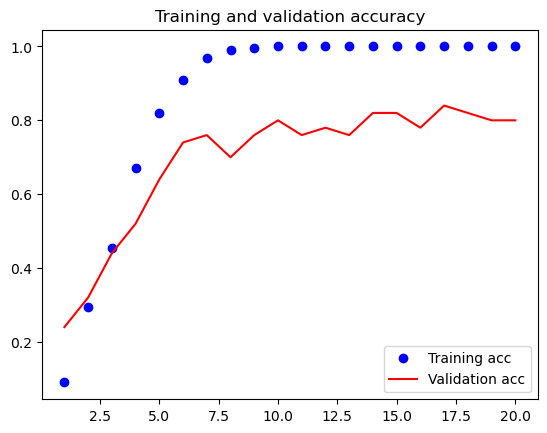

<Figure size 640x480 with 0 Axes>

In [66]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Loss base model

<Figure size 640x480 with 0 Axes>

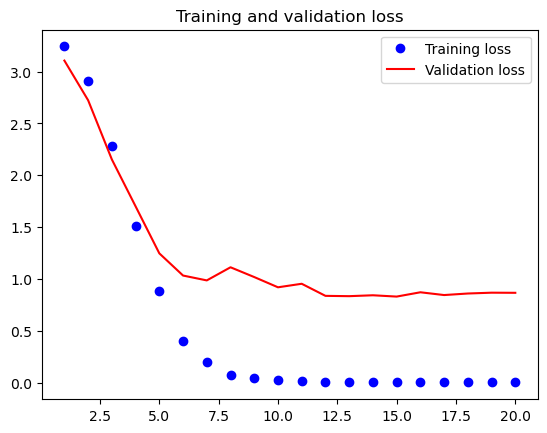

<Figure size 640x480 with 0 Axes>

In [67]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [68]:
# Lets improve

In [69]:
# Model 2

In [70]:
# Adding parameters in the ImageDatagenerator

In [71]:
train_datagen = ImageDataGenerator(rescale=1./225, shear_range=0.5,
                                  zoom_range=0.5, width_shift_range=0.2,
                                  height_shift_range=0.2)

In [72]:
# No transformations are done on the testing images

In [73]:
test_datgen = ImageDataGenerator(rescale=1./225)

In [74]:
# Generating the training data

In [75]:
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                target_size=(64,64),
                                                batch_size=20,
                                                class_mode='categorical')

Found 200 images belonging to 25 classes.


In [76]:
# Generating the validation data

In [77]:
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                target_size=(64,64),
                                                batch_size=20,
                                                class_mode='categorical')

Found 50 images belonging to 25 classes.


In [78]:
#Create Cnn deep learning model

In [79]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [80]:
# Initializing the Convolutional Neural Network

In [81]:
classifier = Sequential()

In [82]:
# Convolution

In [83]:
classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation ='relu'))

In [84]:
#Max Pooling

In [85]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [86]:
# Additional layer of convolution for better accuracy

In [87]:
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

In [88]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [89]:
#Flattening

In [90]:
classifier.add(Flatten())

In [91]:
#Fully connected neural network

In [92]:
classifier.add(Dense(64, activation='relu'))#hidden layer

In [93]:
classifier.add(Dense(25, activation='softmax'))#output layer

In [94]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [95]:
#Compiler

In [96]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])

In [97]:
#Execute

In [98]:
#Starting the model training

In [99]:
history = classifier.fit_generator(training_set, epochs =100,
                                  validation_data=validation_set)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12964\346272482.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs =100,


Epoch 1/100
10/10 [==============================] - 10s 933ms/step - loss: 3.3886 - accuracy: 0.0250 - val_loss: 3.2114 - val_accuracy: 0.0400
Epoch 2/100
10/10 [==============================] - 9s 872ms/step - loss: 3.2180 - accuracy: 0.0400 - val_loss: 3.2114 - val_accuracy: 0.0400
Epoch 3/100
10/10 [==============================] - 9s 887ms/step - loss: 3.2121 - accuracy: 0.0500 - val_loss: 3.1946 - val_accuracy: 0.1400
Epoch 4/100
10/10 [==============================] - 9s 912ms/step - loss: 3.2094 - accuracy: 0.0750 - val_loss: 3.1630 - val_accuracy: 0.0800
Epoch 5/100
10/10 [==============================] - 9s 931ms/step - loss: 3.1309 - accuracy: 0.0900 - val_loss: 3.0382 - val_accuracy: 0.0800
Epoch 6/100
10/10 [==============================] - 9s 926ms/step - loss: 3.0540 - accuracy: 0.0750 - val_loss: 2.9405 - val_accuracy: 0.1400
Epoch 7/100
10/10 [==============================] - 9s 932ms/step - loss: 2.9632 - accuracy: 0.1050 - val_loss: 2.8104 - val_accuracy: 0.160

Epoch 58/100
10/10 [==============================] - 10s 976ms/step - loss: 0.5696 - accuracy: 0.8500 - val_loss: 0.5984 - val_accuracy: 0.8200
Epoch 59/100
10/10 [==============================] - 11s 1s/step - loss: 0.6299 - accuracy: 0.8100 - val_loss: 0.6521 - val_accuracy: 0.7600
Epoch 60/100
10/10 [==============================] - 12s 1s/step - loss: 0.5001 - accuracy: 0.8450 - val_loss: 0.6441 - val_accuracy: 0.7600
Epoch 61/100
10/10 [==============================] - 11s 977ms/step - loss: 0.7305 - accuracy: 0.7500 - val_loss: 0.8213 - val_accuracy: 0.7200
Epoch 62/100
10/10 [==============================] - 9s 943ms/step - loss: 0.7228 - accuracy: 0.7750 - val_loss: 0.7381 - val_accuracy: 0.7800
Epoch 63/100
10/10 [==============================] - 9s 933ms/step - loss: 0.6932 - accuracy: 0.7800 - val_loss: 0.7672 - val_accuracy: 0.7000
Epoch 64/100
10/10 [==============================] - 9s 943ms/step - loss: 0.5979 - accuracy: 0.8150 - val_loss: 0.6159 - val_accuracy: 0

In [100]:
#Displaying curves of loss and accuracy during training

In [101]:
import matplotlib.pyplot as plt

In [102]:
acc = history.history['accuracy']

In [103]:
val_acc = history.history['val_accuracy']

In [104]:
loss = history.history['loss']

In [105]:
val_loss = history.history['val_loss']

In [106]:
epochs = range(1, len(acc) + 1)

<Figure size 640x480 with 0 Axes>

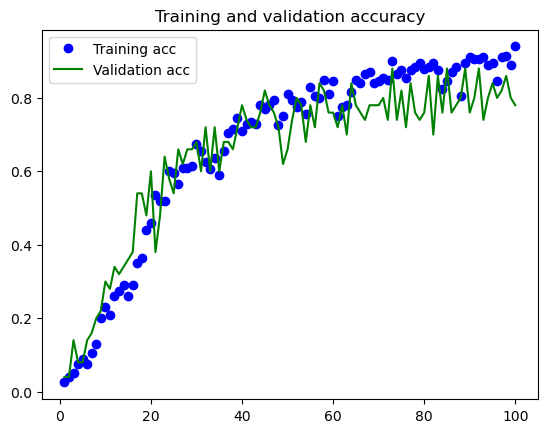

<Figure size 640x480 with 0 Axes>

In [107]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

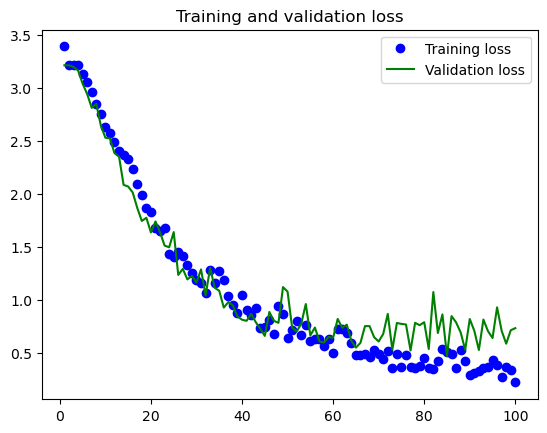

<Figure size 640x480 with 0 Axes>

In [108]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()